In [1]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [2]:
transformer = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

In [3]:
trainset = datasets.MNIST('./data/MNIST_data/', download=True, train=True, transform=transformer)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)

In [4]:
from torch import nn, optim
import torch.nn.functional as F

class ClassifierNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.ly1 = nn.Linear(784, 128)
        self.ly2 = nn.Linear(128,64)
        self.ly3 = nn.Linear(64, 10)

    
    def forward(self, x):
        x = x.view(x.shape[0], -1) #flatten

        x = F.relu(self.ly1(x))
        x = F.relu(self.ly2(x))

        return F.log_softmax(self.ly3(x), dim=1)


EPOCHS = 50
criterion = nn.NLLLoss()

In [5]:
def train(model, optimizer, log_title=""):
    j_history = []
    for e in range(EPOCHS):
        epoch_loss = 0
        for imgs, labels in trainloader:
            probab = model(imgs)
            loss = criterion(probab, labels)
            epoch_loss += loss.item()

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        
        
        if log_title:
            print(f'{log_title} @ epoch {e+1} :: loss = {epoch_loss/len(trainloader)}')
        j_history.append(epoch_loss/len(trainloader))
    
    return j_history

#### SGD


In [6]:
model = ClassifierNN()

optimizer = optim.SGD(model.parameters(), lr=0.03)
sgd_losses = train(model, optimizer, "SGD")



SGD @ epoch 1 :: loss = 0.6252051915790735
SGD @ epoch 2 :: loss = 0.2902538518566313
SGD @ epoch 3 :: loss = 0.22683053465286043
SGD @ epoch 4 :: loss = 0.17971609743323916
SGD @ epoch 5 :: loss = 0.14890878840979102
SGD @ epoch 6 :: loss = 0.12703825688676668
SGD @ epoch 7 :: loss = 0.11003507714944957
SGD @ epoch 8 :: loss = 0.09725251837846027
SGD @ epoch 9 :: loss = 0.08682787209860425
SGD @ epoch 10 :: loss = 0.07886044968610634
SGD @ epoch 11 :: loss = 0.07176401959791748
SGD @ epoch 12 :: loss = 0.06517175439276549
SGD @ epoch 13 :: loss = 0.05952039184465782
SGD @ epoch 14 :: loss = 0.05515554262601188
SGD @ epoch 15 :: loss = 0.05095060202710108
SGD @ epoch 16 :: loss = 0.04690583073211385
SGD @ epoch 17 :: loss = 0.04358518864862176
SGD @ epoch 18 :: loss = 0.04070544712280712
SGD @ epoch 19 :: loss = 0.036936313602705995
SGD @ epoch 20 :: loss = 0.034794758386494935
SGD @ epoch 21 :: loss = 0.03189713213352491
SGD @ epoch 22 :: loss = 0.02988377450429189
SGD @ epoch 23 :: l

##### Momentum


In [7]:
model = ClassifierNN()
optimizer = optim.SGD(model.parameters(), lr=0.03, momentum=0.9)
mtm_losses = train(model, optimizer, "Momentum")


Momentum @ epoch 1 :: loss = 0.3566063681105052
Momentum @ epoch 2 :: loss = 0.17110812313743493
Momentum @ epoch 3 :: loss = 0.1310744053090432
Momentum @ epoch 4 :: loss = 0.10811191138380499
Momentum @ epoch 5 :: loss = 0.09305690458741413
Momentum @ epoch 6 :: loss = 0.08424898414988753
Momentum @ epoch 7 :: loss = 0.07448510079508595
Momentum @ epoch 8 :: loss = 0.06960611380619317
Momentum @ epoch 9 :: loss = 0.06222304939569137
Momentum @ epoch 10 :: loss = 0.059087808704068726
Momentum @ epoch 11 :: loss = 0.05711952260471255
Momentum @ epoch 12 :: loss = 0.05338002543827928
Momentum @ epoch 13 :: loss = 0.04491534288335931
Momentum @ epoch 14 :: loss = 0.047588531224612846
Momentum @ epoch 15 :: loss = 0.050776683197064236
Momentum @ epoch 16 :: loss = 0.045203924046480964
Momentum @ epoch 17 :: loss = 0.03529606841238652
Momentum @ epoch 18 :: loss = 0.036170624376039205
Momentum @ epoch 19 :: loss = 0.0395653325890625
Momentum @ epoch 20 :: loss = 0.044212682726738076
Moment

##### Nesterov

In [8]:
model = ClassifierNN()
optimizer = optim.SGD(model.parameters(), lr=0.03, momentum=0.9, nesterov=True)
nestv_losses = train(model, optimizer, "Nesterov")

Nesterov @ epoch 1 :: loss = 0.32086016399773964
Nesterov @ epoch 2 :: loss = 0.15487894102104946
Nesterov @ epoch 3 :: loss = 0.12045512967921698
Nesterov @ epoch 4 :: loss = 0.10335701928664642
Nesterov @ epoch 5 :: loss = 0.09052358066334502
Nesterov @ epoch 6 :: loss = 0.07916811859554876
Nesterov @ epoch 7 :: loss = 0.07341048414910784
Nesterov @ epoch 8 :: loss = 0.0679600815767043
Nesterov @ epoch 9 :: loss = 0.06274374418633569
Nesterov @ epoch 10 :: loss = 0.05731607450724347
Nesterov @ epoch 11 :: loss = 0.05690794844168679
Nesterov @ epoch 12 :: loss = 0.05130839932140639
Nesterov @ epoch 13 :: loss = 0.04726724942963295
Nesterov @ epoch 14 :: loss = 0.04694602405131141
Nesterov @ epoch 15 :: loss = 0.04570836787857835
Nesterov @ epoch 16 :: loss = 0.04259797919518078
Nesterov @ epoch 17 :: loss = 0.03987711335227118
Nesterov @ epoch 18 :: loss = 0.03827979591008042
Nesterov @ epoch 19 :: loss = 0.0362774686720808
Nesterov @ epoch 20 :: loss = 0.03970340682490384
Nesterov @ 

##### Adagrad

In [9]:
model = ClassifierNN()
optimizer = optim.Adagrad(model.parameters(), lr=0.08, eps=1e-8 )
adgd_losses = train(model, optimizer, "Adagrad")

Adagrad @ epoch 1 :: loss = 0.7043312887933209
Adagrad @ epoch 2 :: loss = 0.21172012219916403
Adagrad @ epoch 3 :: loss = 0.17375904197361805
Adagrad @ epoch 4 :: loss = 0.15113030991522963
Adagrad @ epoch 5 :: loss = 0.1378107955942411
Adagrad @ epoch 6 :: loss = 0.12685291916886562
Adagrad @ epoch 7 :: loss = 0.11818225428299196
Adagrad @ epoch 8 :: loss = 0.11186481860758209
Adagrad @ epoch 9 :: loss = 0.10564410633274487
Adagrad @ epoch 10 :: loss = 0.09953256733397813
Adagrad @ epoch 11 :: loss = 0.09613652927562721
Adagrad @ epoch 12 :: loss = 0.0911477742724613
Adagrad @ epoch 13 :: loss = 0.08872009578820214
Adagrad @ epoch 14 :: loss = 0.08441492965442937
Adagrad @ epoch 15 :: loss = 0.08210029592191471
Adagrad @ epoch 16 :: loss = 0.07937884795343451
Adagrad @ epoch 17 :: loss = 0.07535688163809923
Adagrad @ epoch 18 :: loss = 0.0737745753069446
Adagrad @ epoch 19 :: loss = 0.07182166714227196
Adagrad @ epoch 20 :: loss = 0.07010862236591314
Adagrad @ epoch 21 :: loss = 0.06

##### RMSProp

In [16]:
model = ClassifierNN()
optimizer = optim.RMSprop(model.parameters(), lr=0.03, momentum=0.9, eps=1e-8 )
rms_losses = train(model, optimizer, "RMSProp")

RMSProp @ epoch 1 :: loss = 89.55450601516756
RMSProp @ epoch 2 :: loss = 2.356811829467318
RMSProp @ epoch 3 :: loss = 2.3252818437019136
RMSProp @ epoch 4 :: loss = 2.3262290415733355
RMSProp @ epoch 5 :: loss = 2.326170561410217
RMSProp @ epoch 6 :: loss = 2.327378912775247
RMSProp @ epoch 7 :: loss = 2.323472761141974
RMSProp @ epoch 8 :: loss = 2.325790216673666
RMSProp @ epoch 9 :: loss = 2.325621619661734
RMSProp @ epoch 10 :: loss = 2.326797647262687
RMSProp @ epoch 11 :: loss = 2.325077059934897
RMSProp @ epoch 12 :: loss = 2.3250479116114473
RMSProp @ epoch 13 :: loss = 2.3261171825913225
RMSProp @ epoch 14 :: loss = 2.3259360897007273
RMSProp @ epoch 15 :: loss = 2.3253560864340774
RMSProp @ epoch 16 :: loss = 2.3255643168492104
RMSProp @ epoch 17 :: loss = 2.3244357312411896
RMSProp @ epoch 18 :: loss = 2.3255037132865075
RMSProp @ epoch 19 :: loss = 2.324855174082937
RMSProp @ epoch 20 :: loss = 2.3277147085681906
RMSProp @ epoch 21 :: loss = 2.324287259248274
RMSProp @ ep

##### Adam

In [11]:
model = ClassifierNN()
optimizer = optim.Adam(model.parameters(), lr=0.003, betas=(0.9, 0.999))
adam_losses = train(model, optimizer, "Adam")


Adam @ epoch 1 :: loss = 0.3409087832437268
Adam @ epoch 2 :: loss = 0.17055935119646096
Adam @ epoch 3 :: loss = 0.13918218605005855
Adam @ epoch 4 :: loss = 0.12531532711937213
Adam @ epoch 5 :: loss = 0.1084209682329544
Adam @ epoch 6 :: loss = 0.10293287590720943
Adam @ epoch 7 :: loss = 0.09899758407846093
Adam @ epoch 8 :: loss = 0.0908322724073615
Adam @ epoch 9 :: loss = 0.08970646541079146
Adam @ epoch 10 :: loss = 0.08089351539350133
Adam @ epoch 11 :: loss = 0.08081484730055095
Adam @ epoch 12 :: loss = 0.07749564217822776
Adam @ epoch 13 :: loss = 0.07478277447085127
Adam @ epoch 14 :: loss = 0.07451071832358201
Adam @ epoch 15 :: loss = 0.07091378852072706
Adam @ epoch 16 :: loss = 0.06323618457821045
Adam @ epoch 17 :: loss = 0.06714707311108904
Adam @ epoch 18 :: loss = 0.06716830339693555
Adam @ epoch 19 :: loss = 0.06676209548639116
Adam @ epoch 20 :: loss = 0.05781360326570271
Adam @ epoch 21 :: loss = 0.059370392525316756
Adam @ epoch 22 :: loss = 0.06237673826126217

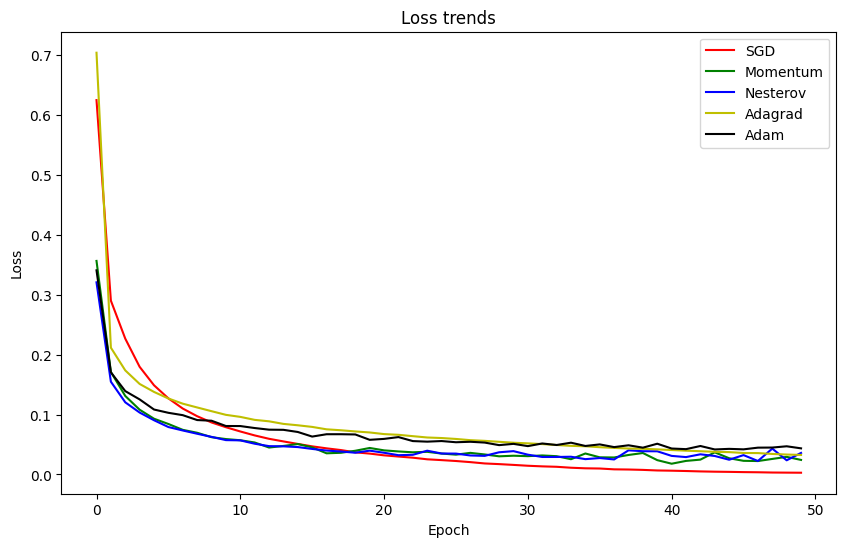

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(sgd_losses, label='SGD', color='r')
plt.plot(mtm_losses, label='Momentum', color='g')
plt.plot(nestv_losses, label='Nesterov', color='b')
plt.plot(adgd_losses, label='Adagrad', color='y')
# plt.plot(rms_losses, label='RMSProp', color='m')
plt.plot(adam_losses, label='Adam', color='k')

plt.title('Loss trends')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend()
plt.show()